In [17]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

df=pd.read_csv("data/moodle7numericos.csv",header=0)
df2=df.iloc[:, 1:-1].copy()
enc=KBinsDiscretizer(n_bins=3,encode='ordinal', strategy='uniform')
enc.fit(df2)
df2=enc.transform(df2)
df2=pd.DataFrame (df2, columns = ["n_assignment","n_posts","n_read","n_quiz","n_quiz_a","n_quiz_s","total_time_assignment","total_time_quiz","total_time_forum"])
#print(df2)
df_merged = pd.concat([df.iloc[:,0], df2,df.iloc[:,-1]], axis=1, join='inner')
df_merged=df_merged.replace({0:'LOW', 1:'MEDIUM', 2:'HIGH'})
print(df_merged)

     course n_assignment n_posts n_read  n_quiz n_quiz_a n_quiz_s  \
0        88       MEDIUM     LOW    LOW     LOW      LOW      LOW   
1        88       MEDIUM     LOW    LOW     LOW      LOW      LOW   
2        88       MEDIUM     LOW    LOW     LOW      LOW      LOW   
3        88       MEDIUM     LOW    LOW     LOW      LOW      LOW   
4        88       MEDIUM     LOW    LOW     LOW      LOW      LOW   
..      ...          ...     ...    ...     ...      ...      ...   
433     218         HIGH     LOW    LOW  MEDIUM   MEDIUM      LOW   
434     218         HIGH     LOW    LOW     LOW      LOW      LOW   
435     218          LOW     LOW    LOW     LOW      LOW      LOW   
436     218         HIGH     LOW    LOW     LOW      LOW      LOW   
437     218         HIGH     LOW    LOW  MEDIUM   MEDIUM      LOW   

    total_time_assignment total_time_quiz total_time_forum       mark  
0                     LOW             LOW              LOW       FAIL  
1                     LOW  

In [14]:
#n_assignment,n_posts,n_read,n_quiz,n_quiz_a,n_quiz_s,total_time_assignment,total_time_quiz,total_time_forum,mark
marks = df_moodle["mark"].value_counts()
n_assignment = df_moodle["n_assignment"].value_counts()
n_posts = df_moodle["n_posts"].value_counts()
new2 = pd.DataFrame({
        'mark': marks.index,
        'count_mark': marks.values
})
new3= pd.DataFrame({
        'n_assignment': n_assignment.index,
        'count_mark': n_assignment.values
})
new4= pd.DataFrame({
        'n_posts': n_posts.index,
        'count_ass': n_assignment.values,
        'count_mark': n_posts.values
})

In [24]:
select_low = df_moodle[(df_moodle['total_time_assignment'])=='LOW']

In [26]:
len(select_low)

372

In [4]:
seasons = list(df_moodle['total_time_forum'])

In [5]:
seasons.sort(reverse = True)

In [20]:
new2['mark']

Index(['mark', 'Count'], dtype='object')

In [7]:
import joblib

model=joblib.load(open('./assets/my_model.joblib','rb'))
print(model.feature_names)

    student_id  course  n_assignment  n_posts  n_read  n_quiz  n_quiz_a  \
0            1     218            11        3       0       9         7   
1            2     218            11        0       0       5         1   
2            3     218             0        0       0       1         0   
3            4     218             9        0       0       0         0   
4            5     218             0        0       0       0         0   
5            6     218            11        0       0       4         4   
6            7     218             0        0       0       1         0   
7            8     218            10        0       0       1         1   
8            9     218            10        1       0       3         2   
9           10     218             0        0       0       4         2   
10          11     218            11        1       0       7         7   
11          12     218            11        0       0       2         1   
12          13     218   

print(df_moodle)


In [8]:
df_moodle_assignment = df_moodle[['student_id','n_assignment','total_time_assignment','mark']]
df_moodle_quiz = df_moodle[['student_id', 'n_quiz', 'n_quiz_a', 'n_quiz_s','total_time_quiz','mark']]

In [9]:
df_moodle_assignment

,student_id,n_assignment,total_time_assignment,mark
0,1,11,374,PASS
1,2,11,754,PASS
2,3,0,0,FAIL
3,4,9,856,PASS
4,5,0,0,FAIL
5,6,11,787,PASS
6,7,0,0,PASS
7,8,10,828,FAIL
8,9,10,332,PASS
9,10,0,0,FAIL


In [10]:
df_moodle_quiz

,student_id,n_quiz,n_quiz_a,n_quiz_s,total_time_quiz,mark
0,1,9,7,2,4601,PASS
1,2,5,1,4,0,PASS
2,3,1,0,1,770,FAIL
3,4,0,0,0,203,PASS
4,5,0,0,0,34,FAIL
5,6,4,4,0,1255,PASS
6,7,1,0,1,684,PASS
7,8,1,1,0,229,FAIL
8,9,3,2,1,1897,PASS
9,10,4,2,2,3126,FAIL


In [11]:
merge_table = pd.merge(df_moodle_assignment, df_moodle_quiz, how='inner', on='student_id')

In [12]:
merge_table

,student_id,n_assignment,total_time_assignment,mark_x,n_quiz,n_quiz_a,n_quiz_s,total_time_quiz,mark_y
0,1,11,374,PASS,9,7,2,4601,PASS
1,2,11,754,PASS,5,1,4,0,PASS
2,3,0,0,FAIL,1,0,1,770,FAIL
3,4,9,856,PASS,0,0,0,203,PASS
4,5,0,0,FAIL,0,0,0,34,FAIL
5,6,11,787,PASS,4,4,0,1255,PASS
6,7,0,0,PASS,1,0,1,684,PASS
7,8,10,828,FAIL,1,1,0,229,FAIL
8,9,10,332,PASS,3,2,1,1897,PASS
9,10,0,0,FAIL,4,2,2,3126,FAIL


In [13]:
df_moodle_pass = merge_table[merge_table['mark_x']=='PASS']

In [14]:
df_moodle_pass

,student_id,n_assignment,total_time_assignment,mark_x,n_quiz,n_quiz_a,n_quiz_s,total_time_quiz,mark_y
0,1,11,374,PASS,9,7,2,4601,PASS
1,2,11,754,PASS,5,1,4,0,PASS
3,4,9,856,PASS,0,0,0,203,PASS
5,6,11,787,PASS,4,4,0,1255,PASS
6,7,0,0,PASS,1,0,1,684,PASS
8,9,10,332,PASS,3,2,1,1897,PASS
10,11,11,259,PASS,7,7,0,2324,PASS
11,12,11,424,PASS,2,1,1,1623,PASS
12,13,11,2035,PASS,3,3,0,1399,PASS
14,15,11,337,PASS,7,7,0,2496,PASS


In [15]:
keys = list(df_moodle['student_id'])
keys

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [16]:
values = list(df_moodle['mark'])
values

['PASS',
 'PASS',
 'FAIL',
 'PASS',
 'FAIL',
 'PASS',
 'PASS',
 'FAIL',
 'PASS',
 'FAIL',
 'PASS',
 'PASS',
 'PASS',
 'FAIL',
 'PASS',
 'FAIL',
 'PASS',
 'FAIL',
 'PASS',
 'FAIL']

In [17]:
moodle_dict = dict(zip(keys, values))
moodle_dict

{1: 'PASS',
 2: 'PASS',
 3: 'FAIL',
 4: 'PASS',
 5: 'FAIL',
 6: 'PASS',
 7: 'PASS',
 8: 'FAIL',
 9: 'PASS',
 10: 'FAIL',
 11: 'PASS',
 12: 'PASS',
 13: 'PASS',
 14: 'FAIL',
 15: 'PASS',
 16: 'FAIL',
 17: 'PASS',
 18: 'FAIL',
 19: 'PASS',
 20: 'FAIL'}

In [18]:
sorted(moodle_dict.values())

['FAIL',
 'FAIL',
 'FAIL',
 'FAIL',
 'FAIL',
 'FAIL',
 'FAIL',
 'FAIL',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS',
 'PASS']

In [19]:
sorted(moodle_dict, key=moodle_dict.get)

[3, 5, 8, 10, 14, 16, 18, 20, 1, 2, 4, 6, 7, 9, 11, 12, 13, 15, 17, 19]

In [20]:
{k: v for k, v in sorted(moodle_dict.items(), key=lambda item: item[1])}

{3: 'FAIL',
 5: 'FAIL',
 8: 'FAIL',
 10: 'FAIL',
 14: 'FAIL',
 16: 'FAIL',
 18: 'FAIL',
 20: 'FAIL',
 1: 'PASS',
 2: 'PASS',
 4: 'PASS',
 6: 'PASS',
 7: 'PASS',
 9: 'PASS',
 11: 'PASS',
 12: 'PASS',
 13: 'PASS',
 15: 'PASS',
 17: 'PASS',
 19: 'PASS'}

In [21]:
select_student = df_moodle[(df_moodle['student_id'])==1]
select_student

,student_id,course,n_assignment,n_posts,n_read,n_quiz,n_quiz_a,n_quiz_s,total_time_assignment,total_time_quiz,total_time_forum,mark
0,1,218,11,3,0,9,7,2,374,4601,4826,PASS


In [22]:
student_mark = select_student.mark[0]
student_mark

'PASS'

In [23]:
student_n_quiz_a = select_student.n_quiz_a[0]
student_n_quiz_a

7

In [24]:
student_times = select_student.total_time_forum[0]
student_times

4826

In [25]:
models_list = ['KNN', 'SVM', 'PCA', 'Decission Tree']
models_list

['KNN', 'SVM', 'PCA', 'Decission Tree']

In [26]:
df_moodle
df_moodle_v2 = df_moodle[['n_assignment', 'n_posts', 'n_quiz', 'n_quiz_a', 'n_quiz_s', 'total_time_assignment', 'total_time_quiz','total_time_quiz', 'mark']]
df_moodle_v2

,n_assignment,n_posts,n_quiz,n_quiz_a,n_quiz_s,total_time_assignment,total_time_quiz,total_time_quiz,mark
0,11,3,9,7,2,374,4601,4601,PASS
1,11,0,5,1,4,754,0,0,PASS
2,0,0,1,0,1,0,770,770,FAIL
3,9,0,0,0,0,856,203,203,PASS
4,0,0,0,0,0,0,34,34,FAIL
5,11,0,4,4,0,787,1255,1255,PASS
6,0,0,1,0,1,0,684,684,PASS
7,10,0,1,1,0,828,229,229,FAIL
8,10,1,3,2,1,332,1897,1897,PASS
9,0,0,4,2,2,0,3126,3126,FAIL


In [27]:
X=df_moodle_v2.iloc[:,:-1]
y=df_moodle_v2.iloc[:,-1]  
X
                     

,n_assignment,n_posts,n_quiz,n_quiz_a,n_quiz_s,total_time_assignment,total_time_quiz,total_time_quiz
0,11,3,9,7,2,374,4601,4601
1,11,0,5,1,4,754,0,0
2,0,0,1,0,1,0,770,770
3,9,0,0,0,0,856,203,203
4,0,0,0,0,0,0,34,34
5,11,0,4,4,0,787,1255,1255
6,0,0,1,0,1,0,684,684
7,10,0,1,1,0,828,229,229
8,10,1,3,2,1,332,1897,1897
9,0,0,4,2,2,0,3126,3126


In [28]:
y

0     PASS
1     PASS
2     FAIL
3     PASS
4     FAIL
5     PASS
6     PASS
7     FAIL
8     PASS
9     FAIL
10    PASS
11    PASS
12    PASS
13    FAIL
14    PASS
15    FAIL
16    PASS
17    FAIL
18    PASS
19    FAIL
Name: mark, dtype: object

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_std = scaler.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std


,0,1,2,3,4,5,6,7
0,1.000000,1.000000,1.000000,1.000000,0.50,0.183784,1.000000,1.000000
1,1.000000,0.000000,0.555556,0.142857,1.00,0.370516,0.000000,0.000000
2,0.000000,0.000000,0.111111,0.000000,0.25,0.000000,0.167355,0.167355
3,0.818182,0.000000,0.000000,0.000000,0.00,0.420639,0.044121,0.044121
4,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.007390,0.007390
5,1.000000,0.000000,0.444444,0.571429,0.00,0.386732,0.272767,0.272767
6,0.000000,0.000000,0.111111,0.000000,0.25,0.000000,0.148663,0.148663
7,0.909091,0.000000,0.111111,0.142857,0.00,0.406880,0.049772,0.049772
8,0.909091,0.333333,0.333333,0.285714,0.25,0.163145,0.412302,0.412302
9,0.000000,0.000000,0.444444,0.285714,0.50,0.000000,0.679418,0.679418


In [30]:
y=y.replace({'FAIL': 0, 'PASS': 1})
y

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
Name: mark, dtype: int64

In [31]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

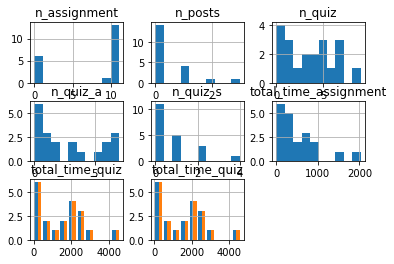

In [32]:
X.hist()
pyplot.show()

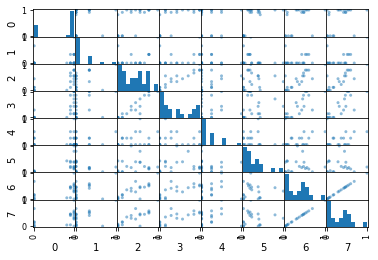

In [33]:
scatter_matrix(X_std)
pyplot.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
classifier =  SVC(C=10, gamma=0.1, kernel='sigmoid')

# Realizamos el entrenamiento
classifier.fit(X_train, y_train)

# Obtenemos el accuracy de nuestro modelo para el conjunto de test
print(classifier.score(X_test, y_test))

0.3333333333333333


In [36]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=6, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.694444 (0.243749)
LDA: 0.638889 (0.202225)
KNN: 0.583333 (0.127294)
CART: 0.555556 (0.368514)
NB: 0.694444 (0.149588)
SVM: 0.638889 (0.062113)


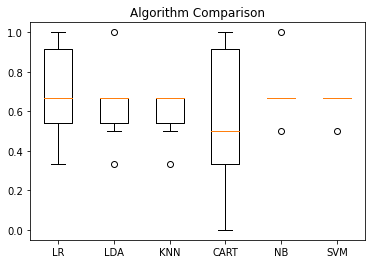

In [37]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [38]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions,zero_division=1))

0.3333333333333333
[[0 2]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.67      0.50      0.25         3
weighted avg       0.78      0.33      0.17         3



In [40]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions,zero_division=1))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   2.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   1.5s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   1.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.333 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.750 total time=   5.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.250 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.667 total time=   2.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.667 total time=   3.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.333 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf